In [2]:
from gen import *

mensaje = "tres tristes tigres"
keystream = generar_keystream(len(mensaje))

print("Keystream: ", keystream)

mensaje_cifrado = cifrar_mensaje(mensaje, keystream)
print("Mensaje cifrado: ", mensaje_cifrado)

mensaje_descifrado = descifrar_mensaje(mensaje_cifrado, keystream)
print("Mensaje descifrado: ", mensaje_descifrado)

mensaje2 = "tragan trigo en un trigal"
mensaje_cifrado2 = cifrar_mensaje(mensaje2, keystream)
print("Mensaje cifrado: ", mensaje_cifrado2)

mensaje_descifrado2 = descifrar_mensaje(mensaje_cifrado2, keystream)
print("Mensaje descifrado: ", mensaje_descifrado2)

Keystream:  ò·Ðÿeº#e$&Þò%e
Mensaje cifrado:  ['11100110', '10000000', '11010010', '10100011', '11011111', '00010001', '11101010', '11010011', '01110000', '01010111', '00000000', '01111100', '00000100', '01010010', '10110111', '10010101', '01010111', '11100101', '00010110']
Mensaje descifrado:  tres tristes tigres
Mensaje cifrado:  ['11100110', '10000000', '11010110', '10110111', '10011110', '00001011', '10111000', '11001110', '01110001', '01001010', '00000010', '01100000', '00000100', '01000011', '10110000', '11010010', '01010000', '11101110', '01000101', '11100110', '10000000', '11011110', '10110111', '10011110', '00001001']
Mensaje descifrado:  tragan trigo en un trigal


1. ¿Como cambia el mensaje cifrado cuando cambias la clave?

R//: Los binarios cambian de forma y distribución.

2. ¿Que sucede si utilizas el mismo keystream?

R//: Los dos mensajes cambian de longitud y los binarios que se usan al momento de cifrar tambien varían.

3. ¿Como afecta la longitud del keystream a la longitud del cifrado?

R//: Si el keystream es  más largo el mensaje por ende será más dificil de descifrar.

In [1]:
from gen import *
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
from binary import *
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
from Crypto.Cipher import AES
import os

def leer_imagen(ruta_imagen):
    try:
        with open(ruta_imagen, "rb") as f:
            return f.read()
    except FileNotFoundError:
        print("El archivo especificado no existe.")
        return None
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return None


In [6]:
clave = b"0123456789abcdef0123456789abcdef"

ruta_imagen = "ayno_encrypted_image.jpeg"
contenido_imagen = leer_imagen(ruta_imagen)

if contenido_imagen is not None:
    try:
        cipher_decrypt = AES.new(clave, AES.MODE_ECB)
        contenido_desencriptado = cipher_decrypt.decrypt(contenido_imagen)

        ruta_imagen_desencriptada = "ayno_decrypted_image_aes.jpeg"
        with open(ruta_imagen_desencriptada, "wb") as archivo_salida:
            archivo_salida.write(contenido_desencriptado)

        print(f"Imagen desencriptada guardada en {ruta_imagen_desencriptada}")
    except Exception as e:
        print(f"Error al descifrar el archivo: {e}")
else:
    print("No se pudo leer la imagen para descifrarla.")

Imagen desencriptada guardada en ayno_decrypted_image_aes.jpeg


In [7]:
def decrypt_image(file_name, key, iv):
    key = bytes.fromhex(key)
    if len(key) != 16:
        raise ValueError("La clave debe ser de 16 bytes")

    iv = bytes.fromhex(iv)
    if len(iv) != 16:
        raise ValueError("El IV debe ser de 16 bytes")

    cipher = AES.new(key, AES.MODE_CBC, iv=iv)

    with open(file_name, 'rb') as f:
        encrypted_data = f.read()

    decrypted_data = unpad(cipher.decrypt(encrypted_data), AES.block_size)

    with open("decrypted_" + file_name, 'wb') as f:
        f.write(decrypted_data)

decrypt_image("ayno_encrypted_image.jpeg", "02e9bf37e279e73aa93a3b0fc3bfed8f", "0123456789abcdef0123456789abcdef")

In [8]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
import os

def convert_key_from_hex(hex_key):
    key = bytes.fromhex(hex_key)
    if len(key) != 16:
        raise ValueError("La clave debe ser de 16 bytes")
    return key

def decrypt_image(file_name, hex_key):
    if not os.path.exists(file_name):
        raise FileNotFoundError(f"El archivo {file_name} no fue encontrado.")
    
    key = convert_key_from_hex(hex_key)
    cipher = AES.new(key, AES.MODE_ECB)

    with open(file_name, 'rb') as file:
        encrypted_data = file.read()

    decrypted_data = unpad(cipher.decrypt(encrypted_data), AES.block_size)

    output_file_name = f"decrypted_{file_name}"
    with open(output_file_name, 'wb') as file:
        file.write(decrypted_data)

    print(f"Imagen desencriptada guardada en {output_file_name}")


decrypt_image("mr-increible_encrypted_image.jpeg", "406845db899854cc23484d6f3f28f3f7")


Imagen desencriptada guardada en decrypted_mr-increible_encrypted_image.jpeg


Se necesita una llave más para poder encriptar con CBC, CBC se puede considerar más seguro y tiene otra capa de seguridad. 

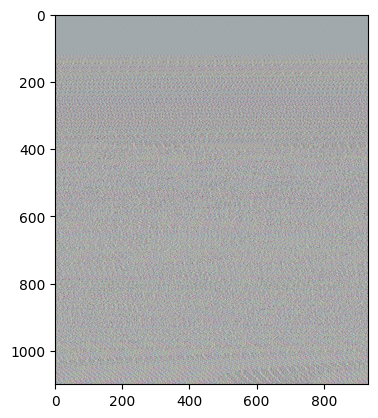

In [9]:
# Cargando la imagen
ruta_imagen = "encrypted_body_ecb.ppm"
img = mpimg.imread(ruta_imagen)

# Muestra la imagen
plt.imshow(img)
plt.show()

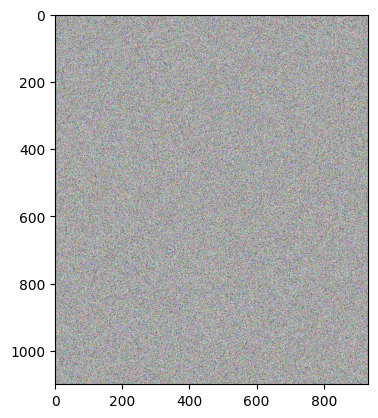

In [10]:
ruta_imagen = "encrypted_body_cbc.ppm"
img = mpimg.imread(ruta_imagen)

plt.imshow(img)
plt.show()

Se puede mencionar que gris es el color que más predomina al igual que no coincide en absoluto con la imagen original.